In [1]:
from google.colab import files
uploaded = files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv


In [50]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv("Keyword_data - Keyword_data.csv")

t = df.set_index('Title').values.tolist()               # Converting the Dataframe to a List            
df = df.drop(['Title'], axis=1)
df_long = pd.melt(df, value_vars=list(df.columns), 
                  value_name='Keywords', ignore_index=False)

In [51]:
df_long['Keywords'].nunique()   

248

In [52]:
df_long = df_long.dropna()
del df_long['variable']

size = df_long['Keywords'].nunique()          
keywords = df_long['Keywords'].unique()

In [53]:
matrix = np.zeros((size, size), dtype = int)

In [54]:
for i in range(0, size):
  for j in range(0, size):
    if i != j:
      if(matrix[i][j] == 0 & matrix[j][i] == 0):
        for k,idx in enumerate(t):
          if(keywords[i] in (t[k])) and (keywords[j] in (t[k])):
            matrix[i][j] = matrix[i][j] + 1
            matrix[j][i] = matrix[j][i] + 1

print(matrix)
matrix.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(248, 248)

Number of Nodes 248
Number of Edges 2141
Network Graph with 248 nodes and 2141 edges
Degree [(0, 10), (1, 18), (2, 24), (3, 31), (4, 19), (5, 9), (6, 10), (7, 49), (8, 90), (9, 62), (10, 14), (11, 16), (12, 20), (13, 42), (14, 14), (15, 16), (16, 102), (17, 18), (18, 32), (19, 11), (20, 93), (21, 24), (22, 9), (23, 166), (24, 26), (25, 31), (26, 55), (27, 9), (28, 31), (29, 9), (30, 17), (31, 9), (32, 35), (33, 48), (34, 15), (35, 26), (36, 11), (37, 19), (38, 11), (39, 11), (40, 66), (41, 29), (42, 16), (43, 17), (44, 11), (45, 32), (46, 10), (47, 64), (48, 16), (49, 10), (50, 25), (51, 23), (52, 9), (53, 17), (54, 11), (55, 18), (56, 20), (57, 9), (58, 9), (59, 9), (60, 9), (61, 9), (62, 46), (63, 9), (64, 9), (65, 7), (66, 9), (67, 28), (68, 11), (69, 37), (70, 11), (71, 9), (72, 9), (73, 11), (74, 9), (75, 10), (76, 9), (77, 10), (78, 10), (79, 17), (80, 9), (81, 29), (82, 10), (83, 37), (84, 10), (85, 9), (86, 16), (87, 9), (88, 66), (89, 10), (90, 9), (91, 9), (92, 9), (93, 9), (

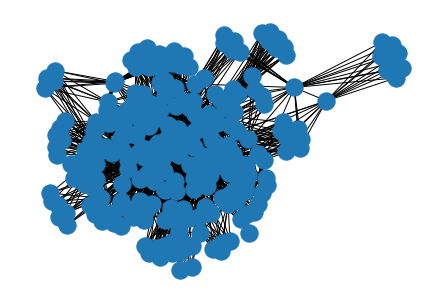

In [56]:
import networkx as nx
graph = nx.from_numpy_matrix(matrix, parallel_edges = False)
nx.draw(graph)

print("Number of Nodes", graph.number_of_nodes())
print("Number of Edges", graph.number_of_edges())
print("Network", graph)
print("Degree", graph.degree())
print("Strength", graph.degree(weight = 'weight'))

In [57]:
node = graph.degree()
top_node = sorted(node, key=lambda x: x[1], reverse=True)
print("Top 10 nodes by degree: ")
print(top_node[:10])

Top 10 nodes by degree: 
[(23, 166), (112, 104), (16, 102), (20, 93), (8, 90), (156, 74), (40, 66), (88, 66), (47, 64), (9, 62)]


In [58]:
# top 10 nodes by strength
weg = graph.degree(weight = 'weight')
top_node_weg = sorted(weg, key=lambda x: x[1], reverse=True)
print("Top 10 nodes pairs by strength: ")
print(top_node_weg[:10])

Top 10 nodes pairs by strength: 
[(23, 265), (112, 144), (16, 136), (20, 126), (8, 112), (156, 107), (40, 96), (9, 85), (47, 84), (88, 80)]


In [59]:
a = []
for i in range(0, size):
  for j in range(0, size):
    a.append([keywords[i], keywords[j], matrix[i][j]])

df7 = pd.DataFrame(a, columns = ['x','y','z'], dtype = float);

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [60]:
# Show the top 10 node pairs by weight
print(df7.sort_values(by = ['z'], ascending = False).head(10))

                                  x                             y     z
5816        ORGANIZATIONAL behavior  ORGANIZATIONAL effectiveness  11.0
27799  ORGANIZATIONAL effectiveness       ORGANIZATIONAL behavior  11.0
5860        ORGANIZATIONAL behavior      ORGANIZATIONAL structure   9.0
38711      ORGANIZATIONAL structure       ORGANIZATIONAL behavior   9.0
5724        ORGANIZATIONAL behavior          PERSONNEL management   8.0
4983           PERSONNEL management       ORGANIZATIONAL behavior   8.0
3991             MANAGEMENT science       ORGANIZATIONAL behavior   7.0
5720        ORGANIZATIONAL behavior            MANAGEMENT science   7.0
2007                DECISION making       ORGANIZATIONAL behavior   6.0
5744        ORGANIZATIONAL behavior      ORGANIZATIONAL sociology   6.0


In [68]:
degree = dict(graph.degree()).values()
degree_new = pd.DataFrame.from_dict(degree)

In [69]:
average_strength = dict(graph.degree(weight = 'weight')).values()
average_strength_new = pd.DataFrame.from_dict(average_strength)

In [72]:
output = pd.DataFrame()
output['Strength']= average_strength_new[0]
output['Degree'] = degree_new[0]
output

,Strength,Degree
0,10,10
1,20,18
2,27,24
3,36,31
4,20,19
...,...,...
243,11,11
244,11,11
245,11,11
246,11,11


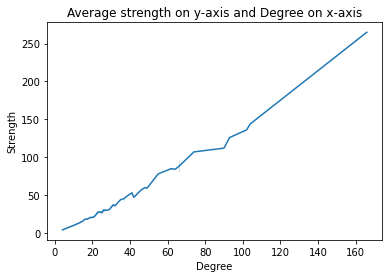

In [73]:
import seaborn as sns
sns.lineplot(data=output, x="Degree", y="Strength").set(title='Average strength on y-axis and Degree on x-axis');